In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [4]:
df.shape

(22628, 10)

In [5]:
df['Label'] = 0

In [6]:
df.loc[df.Rating >= 3, ['Label']] = 1

In [7]:
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [8]:
df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
15567,1044,46,Flimsy,I loved the cut and the stretch in the materia...,2,0,1,General,Bottoms,Pants,0,84
5325,895,46,Nice neutral colors for fall,I am usually a medium/large and was pleased to...,4,1,0,General,Tops,Fine gauge,1,54
21668,1008,30,Beautiful skirt!,I absolutely love the way this skirt looks and...,5,1,0,General Petite,Bottoms,Skirts,1,72
791,1072,35,Stunning! just buy a belt with it.,I saw this dress in the window at the portland...,5,1,3,General,Dresses,Dresses,1,98
1102,829,40,"Elegant, timeless and versatile",Bought this blouse to wear with high wasted je...,5,1,0,General Petite,Tops,Blouses,1,40


In [9]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [10]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


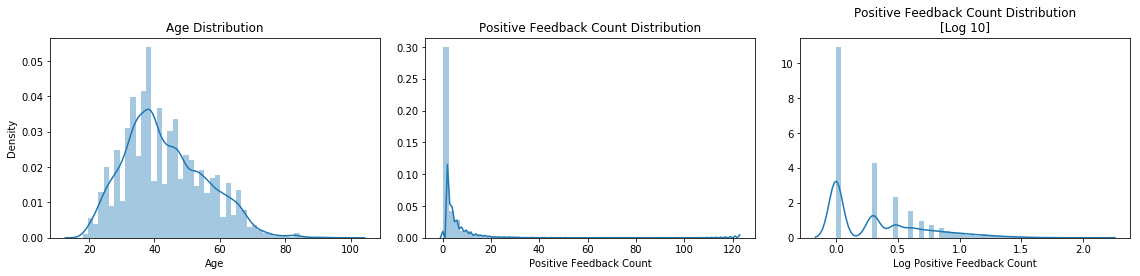

In [11]:
#Age and Positive Feedback Frequency Distributions
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

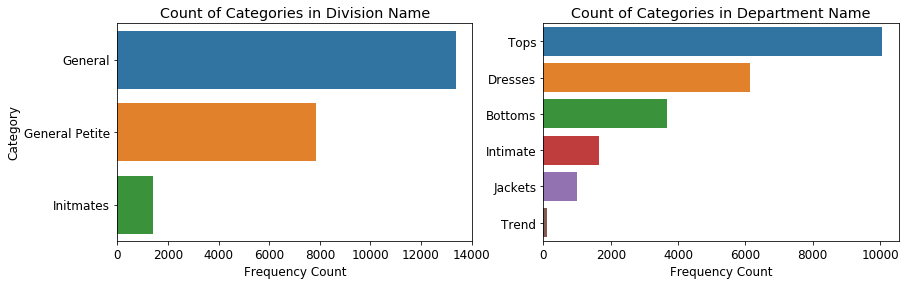

In [12]:
#Division Name and Department Name Distributions
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

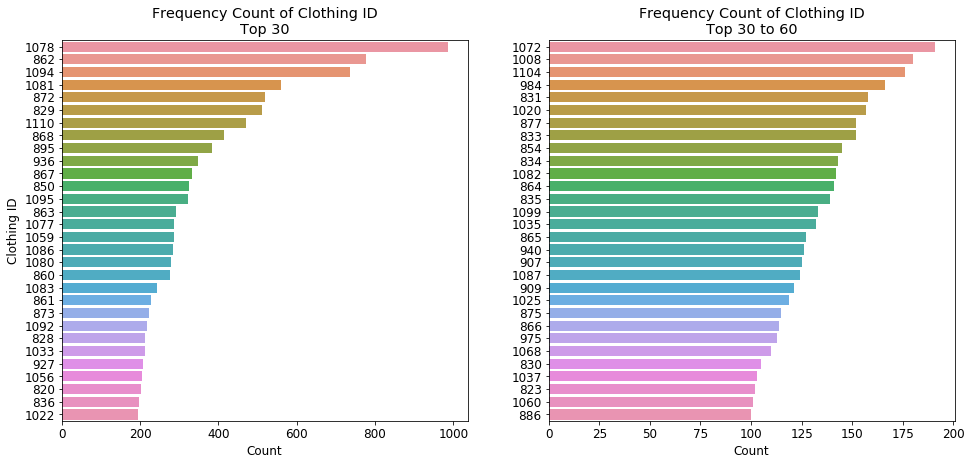

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0


In [13]:
# Clothing ID Category
#Clothing ID Frequency Distribution
f, axes = plt.subplots(1, 2, figsize=[16, 7])
num = 30
sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],
              order= df['Clothing ID'].value_counts()[:num].index, ax=axes[0])
axes[0].set_title('Frequency Count of Clothing ID\nTop 30')
axes[0].set_xlabel('Count')

sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[num:60].index)],
              order=df['Clothing ID'].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title('Frequency Count of Clothing ID\nTop 30 to 60')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')
plt.savefig('freqdist-clothingid-top60.png', format='png', dpi=600)
plt.show()

print('Dataframe Dimension: {} Rows'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078, 862,1094])].describe().T.drop('count',axis=1)

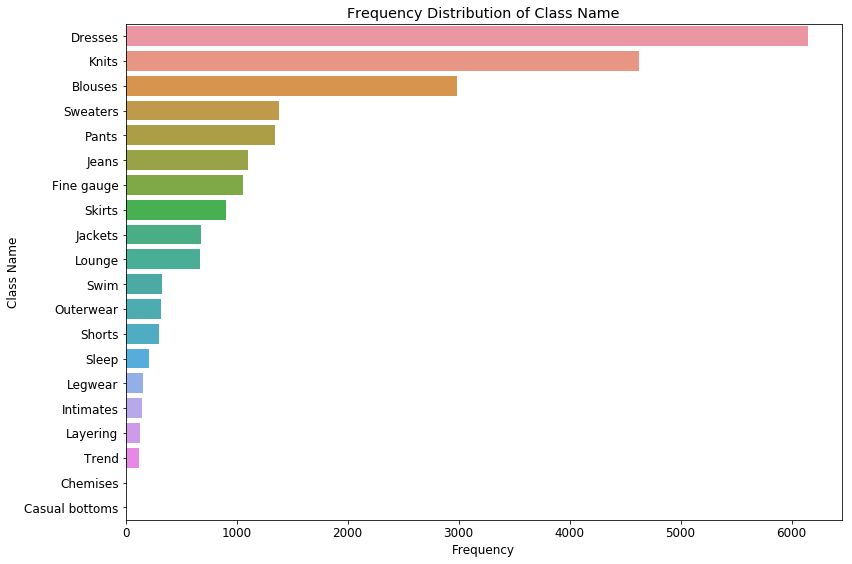

In [14]:
# Class Name
plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()